# Clean-split-textline.ipynb
Clean a handwritten text string, then split into component letters

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import copy

In [2]:
path = "/Users/jonathan/Development/Git/Data-Scientist/" + \
"Handwriting-Analyzer/input/textlines/textline-2-gray.csv"

In [3]:
def make_white_background(csv):
    '''make copy of csv array with background whitened'''
    
    # Get lightness of the darkest pixel of the csv's first row
    darkest_background = min(csv[0])
    csv_white_background = copy.deepcopy(csv)

    for i in range(csv.shape[0]):
        for j in range(csv.shape[1]):
            if csv[i][j] >= darkest_background:
                csv_white_background[i][j] = 255

    return csv_white_background

def whiten_isolated_cells_left_right(csv):
    '''Whiten all cells whose neighbor to left and right are white'''
    csv_new = copy.deepcopy(csv)
    shape_y, shape_x = csv_new.shape
    for irow in range(shape_y):
        if csv[irow][1] == 255:
            csv_new[irow][0] = 255
        if csv[irow][shape_x - 2] == 255:
            csv_new[irow][shape_x - 1] = 255
        for jcol in range(2, shape_x - 2):
            if csv_new[irow][jcol - 1] == 255 == csv_new[irow][jcol + 1]:
                csv_new[irow][jcol] = 255
    return csv_new

def whiten_isolated_cells(csv):
    '''Whiten cells whose top, right, bottom, left neighbors are white'''
    csv_1 = whiten_isolated_cells_left_right(csv)
    csv_2 = whiten_isolated_cells_left_right(csv_1.transpose()).transpose()
    return csv_2

csv_ori.shape: (141, 951)


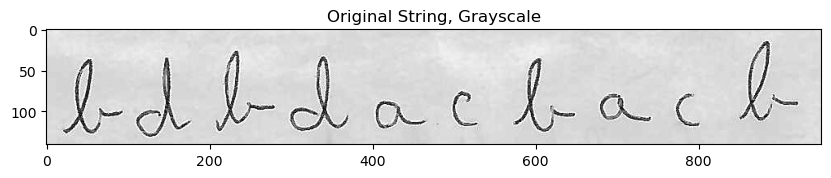

In [4]:
csv_ori = np.loadtxt(path, dtype="int", delimiter=",")
print("csv_ori.shape:", csv_ori.shape)
plt.figure(figsize=(10, 10))
plt.imshow(csv_ori, cmap='gray', vmin=0, vmax=255)
plt.title("Original String, Grayscale")
plt.show()

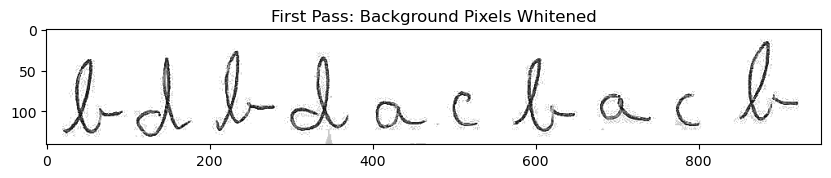

In [5]:
# Whiten background pixels lighter than a cutoff 
# (defined as the darkest pixel in the strip's top row)
csv_white_bg = make_white_background(csv_ori)
plt.figure(figsize=(10, 10))
plt.imshow(csv_white_bg, cmap='gray', vmin=0, vmax=255)
plt.title("First Pass: Background Pixels Whitened")
plt.show()

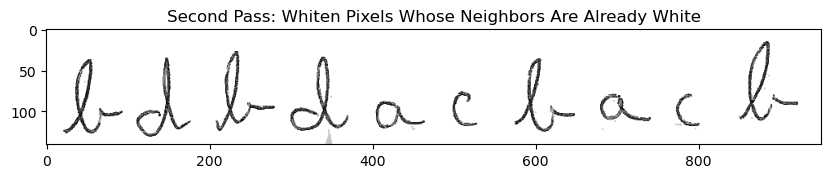

In [6]:
# Whiten pixels whose top,right, bottom, left neighbors are already white
csv_whitened = whiten_isolated_cells(csv_white_bg)

# need to run whiten_isolated_cells() twice!
csv_whitened_2 = whiten_isolated_cells(csv_whitened)

plt.figure(figsize=(10, 10))
plt.imshow(csv_whitened_2, cmap='gray', vmin=0, vmax=255)
plt.title("Second Pass: Whiten Pixels Whose Neighbors Are Already White")
plt.show()

In [7]:
csv_shape_y, csv_shape_x = csv_whitened_2.shape

# Get the minimum pixel brightness for each column
# in the whitened image of the letters
minima = [np.min(csv_whitened_2[:, j]) 
          for j in range(csv_shape_x)]

In [8]:
# Calculate the leftmost & rightmost columns of each letter in the string
leftedges, rightedges = \
    [i for i in range(len(minima)-1) if minima[i] == 255 and minima[i+1] < 255 ], \
    [i+1 for i in range(len(minima)-1) if minima[i] < 255 and minima[i+1] == 255 ]


In [9]:
# Split letters into array of single letters, using each letter's
# leftmost and rightmost columns as limits
split_letters_ar = []
for i in range(len(rightedges)):
    next_letter = np.array(csv_whitened_2[:, range(leftedges[i], 
        rightedges[i])],dtype=float)
    split_letters_ar.append(next_letter)

### Print the letters, unsplit and split

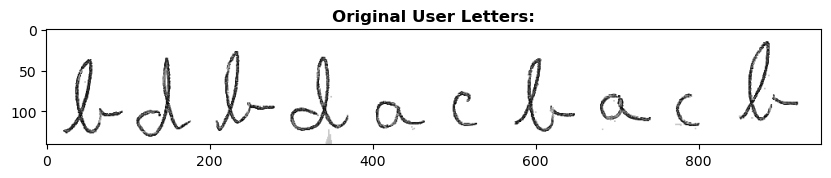

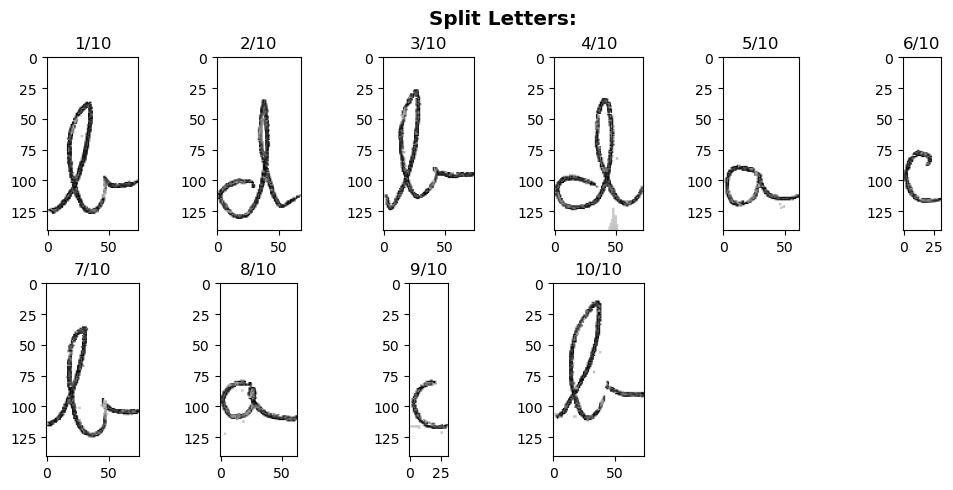

In [14]:
# Show the original text line
plt.figure(figsize=(10, 10))
plt.imshow(csv_whitened_2, cmap='gray', vmin=0, vmax=255)
plt.title("Original User Letters:", fontweight="bold")
plt.show()

# Determine number of columns, rows in subplots of the separated letters
# Formula for nrows depends on whether no. images is an integral multiple of ncols
ncols = 6; nrows = len(rightedges)//ncols + (len(rightedges) % ncols)
plt.figure(figsize=(10,10), layout='constrained')
for i in range(len(rightedges)):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(split_letters_ar[i], cmap="gray")
    plt.title(str(i+1)+ "/" + str(len(rightedges)))
plt.suptitle("Split Letters:", fontsize="x-large", fontweight="demibold")
plt.show()